In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [7]:
train_data=pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')
test_data=pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')

In [8]:
# amt column is removed because of zero variance 
train_data.drop(columns=['Unnamed: 0','first', 'last', 'street', 'city','trans_date_trans_time','trans_num','dob','amt'],inplace=True)
test_data.drop(columns=['Unnamed: 0','first', 'last', 'street', 'city','trans_date_trans_time','trans_num','dob','amt'],inplace=True)
train_data.head()

,cc_num,merchant,category,gender,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,fraud_Kirlin and Sons,personal_care,M,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,3573030041201292,fraud_Sporer-Keebler,personal_care,F,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,F,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,3591919803438423,fraud_Haley Group,misc_pos,M,FL,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,3526826139003047,fraud_Johnston-Casper,travel,M,MI,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


In [9]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])
train_data["state"] = encoder.fit_transform(train_data["state"])
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])
test_data["state"] = encoder.fit_transform(test_data["state"])

In [10]:
X = train_data.drop(['is_fraud'], axis=1)
y = train_data['is_fraud']
X1 = test_data.drop(['is_fraud'], axis=1)
y1 = test_data['is_fraud']

In [11]:
clf = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='auto'), {
    'C': [1,10,20],
}, cv=5, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
train_data1 = pd.DataFrame(clf.cv_results_)
train_data1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.315862,0.088520,0.023507,0.000722,1,{'C': 1},0.99614,0.99614,0.99614,0.99614,0.99614,0.99614,1.389150e-08,1
1,1.315067,0.121702,0.022681,0.000659,10,{'C': 10},0.99614,0.99614,0.99614,0.99614,0.99614,0.99614,1.389150e-08,1
2,1.329715,0.112213,0.022466,0.000733,20,{'C': 20},0.99614,0.99614,0.99614,0.99614,0.99614,0.99614,1.389150e-08,1


In [12]:
from sklearn.metrics import accuracy_score
Model1=LogisticRegression(solver='liblinear', multi_class='auto',C=10)
Model1.fit(X, y)
y_pred = Model1.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score=[]
score.append(accuracy)
score


Accuracy: 0.9942113482561166


[0.9942113482561166]

In [13]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X:", X1.shape)
print("Shape of y:", y1.shape)

Shape of X: (555719, 13)
Shape of y: (555719,)
Shape of X: (1296675, 13)
Shape of y: (1296675,)


In [14]:
rs = RandomForestClassifier()
rs.fit(X,y)
y_pred = rs.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score.append(accuracy)
score


Accuracy: 0.9937393718549367


[0.9942113482561166, 0.9937393718549367]

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
rs = RandomForestClassifier()
rs.fit(X, y)
y_pred = rs.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score[1]=0.9938982397285364
score

[0.9942113482561166, 0.9938982397285364]

In [32]:
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), {
            'criterion': ['gini', 'entropy']
,
}, cv=10, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
train_data3 = pd.DataFrame(clf.cv_results_)
train_data3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,6.058480,0.207704,0.009262,0.003137,gini,{'criterion': 'gini'},0.004661,0.992964,0.967142,0.922821,0.749046,0.157813,0.034100,0.037753,0.088282,0.996059,0.495064,0.437100,2
1,5.343532,0.167215,0.010622,0.003664,entropy,{'criterion': 'entropy'},0.923631,0.993900,0.988879,0.908209,0.682340,0.612917,0.723602,0.664831,0.026758,0.996149,0.752122,0.280477,1


In [17]:
Dtree=tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter="best")
Dtree.fit(X, y)
y_pred = Dtree.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score.append(accuracy)

Accuracy: 0.9860504752540151


In [18]:
plt.rcParams["figure.figsize"] = (20,15)


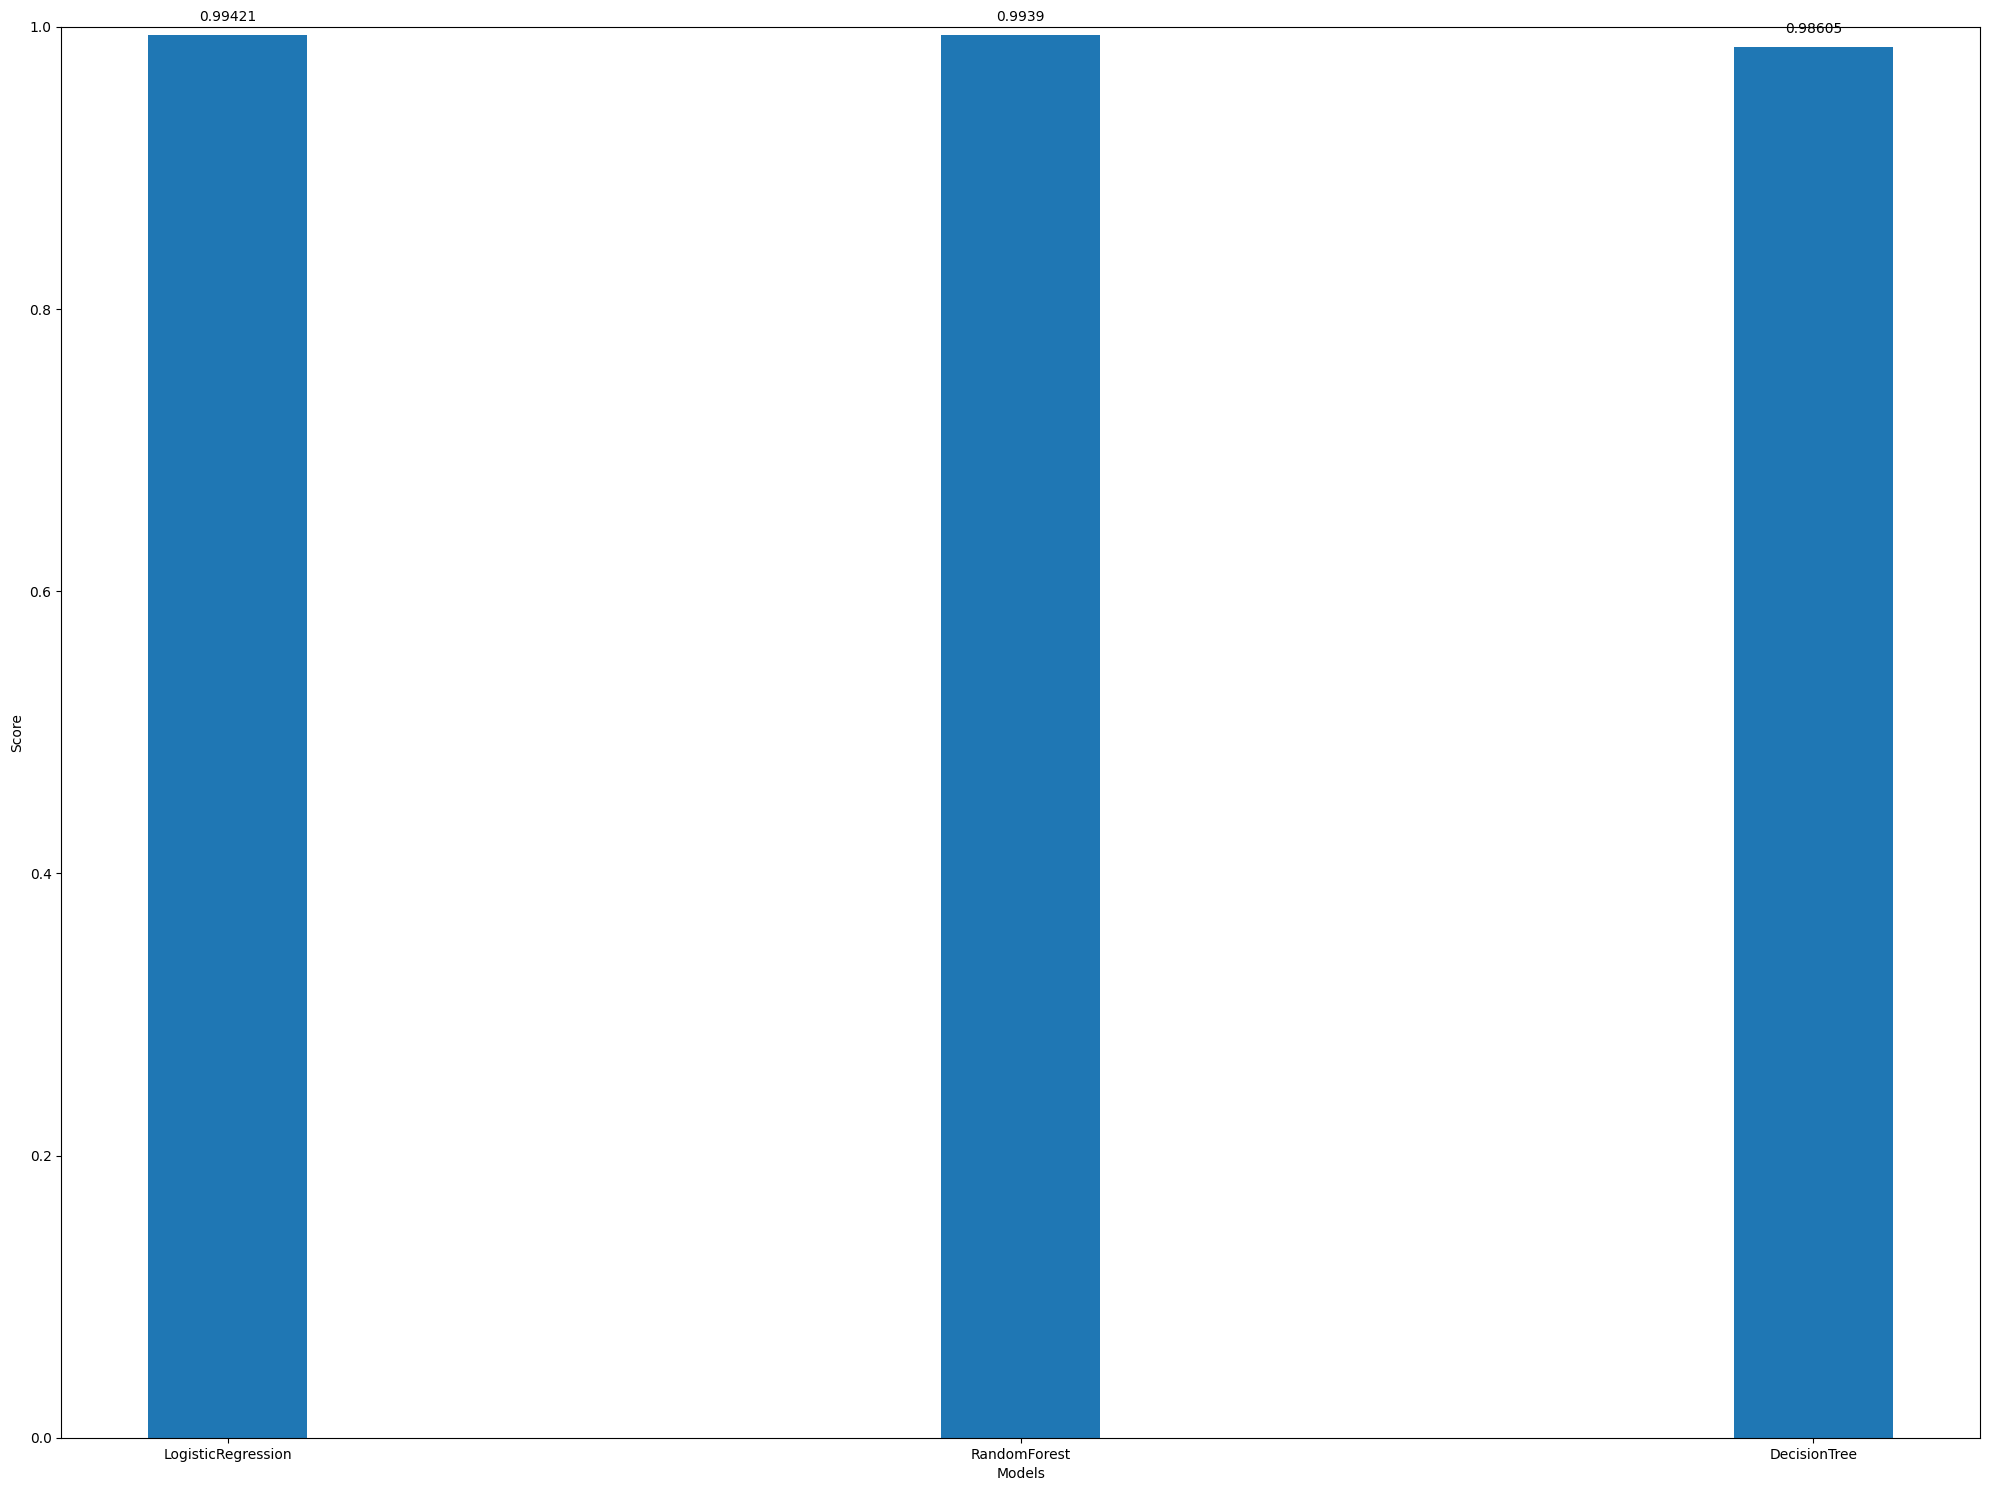

In [23]:
import matplotlib.pyplot as plt
import numpy as np

Models = ['LogisticRegression', 'RandomForest', 'DecisionTree']
y = score

fig, ax = plt.subplots()

x = np.arange(len(Models))

ax.bar(x, y, width=0.2)
ax.set_xticks(x)
ax.set_xticklabels(Models)
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_ylim(0, 1.0)  # Adjust the y-axis limit based on your data range

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.01 , s=str(round(value, 5)), ha='center')

plt.tight_layout()
plt.show()


Logistic Regression is Better we can increase Score by Random Forest But computation is heavy 